In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'legend.fontsize': 'large',
          #'font.size': 16,
          'axes.titlesize': 'x-large'}
pylab.rcParams.update(params)

Norms for the untargeted bb attack

In [3]:
df_bb_clean = pd.read_csv("bb results/clean obs.csv")
df_bb_adv = pd.read_csv("bb results/bb obs.csv")
adv_bb_norms = (df_bb_adv - df_bb_clean).abs().apply(lambda row: np.linalg.norm(row, ord=np.inf), axis='columns')

In [4]:
adv_bb_norms.describe()

count    8759.000000
mean        0.026835
std         0.034024
min         0.000001
25%         0.006319
50%         0.015610
75%         0.034521
max         0.406255
dtype: float64

In [5]:
df_acg_clean = pd.read_csv("adv_obs.csv")
df_acg_adv = pd.read_csv("adv_perturbed_obs.csv")
adv_acg_norms = (df_acg_adv - df_acg_clean).abs().apply(lambda row: np.linalg.norm(row, ord=np.inf), axis='columns')

In [6]:
adv_acg_norms.describe()

count    8759.000000
mean        0.051608
std         0.081779
min         0.000000
25%         0.010000
50%         0.030000
75%         0.050000
max         0.951835
dtype: float64

There should not be 1300 samples outside the $\epsilon_{max}$...

In [7]:
(adv_acg_norms>0.071).sum()/adv_acg_norms.count()

0.14876127411805

In [8]:
df_mypgd_adv = pd.read_csv(r'untargeted_myPGD_05_adv_obs-a.csv',
                                            index_col=0,
                                            usecols = lambda x: x != 'a', #excludes a col
                                            )
df_mypgd_clean = pd.read_csv(r'untargeted_myPGD_05_obs-a.csv',
                                            index_col=0,
                                            usecols = lambda x: x != 'a', #excludes a col
                                            )
adv_pgd_norms = np.linalg.norm(df_mypgd_adv.values -  df_mypgd_clean.values, ord=np.inf, axis=1)

In [9]:
adv_pgd_norms = pd.DataFrame(adv_pgd_norms)

In [10]:
adv_pgd_norms.describe()

,0
count,8.759000e+03
mean,5.000004e-02
std,7.164361e-09
min,5.000000e-02
25%,5.000004e-02
50%,5.000004e-02
75%,5.000004e-02
max,5.000010e-02


In [11]:
adv_norms = pd.concat([adv_acg_norms,adv_bb_norms], axis='columns', keys=['acg', 'bb'])

<Axes: title={'center': 'KDE of Linf Norms for Untargeted Advsersarial Observations Generated by Different Attacks'}, ylabel='Density'>

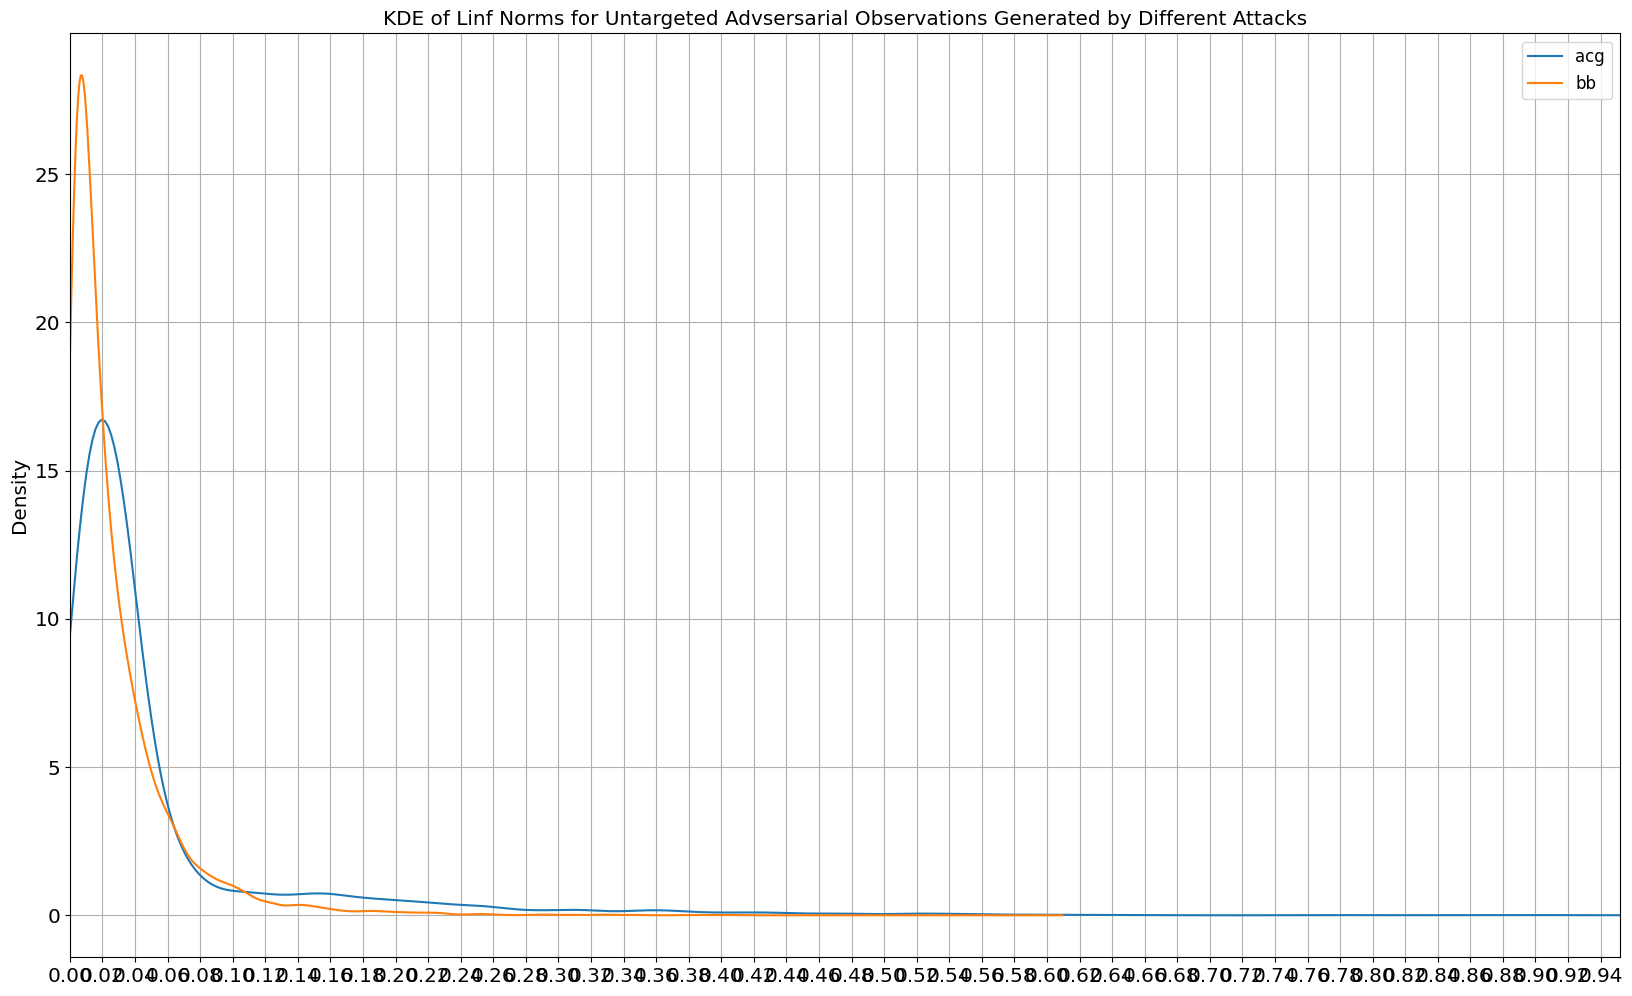

In [12]:
adv_norms.plot.kde(grid=True, 
                   xticks=np.arange(start=adv_norms.min().min(), stop=adv_norms.max().max(), step=0.02),
                   figsize=(20,12),
                   xlim=[adv_norms.min().min(),adv_norms.max().max()], #NB the max/min of a df is a series, and we need the max/min of the series
                   title='KDE of Linf Norms for Untargeted Advsersarial Observations Generated by Different Attacks',
                   xlabel='Linf Norms',
                   legend=True
                   )

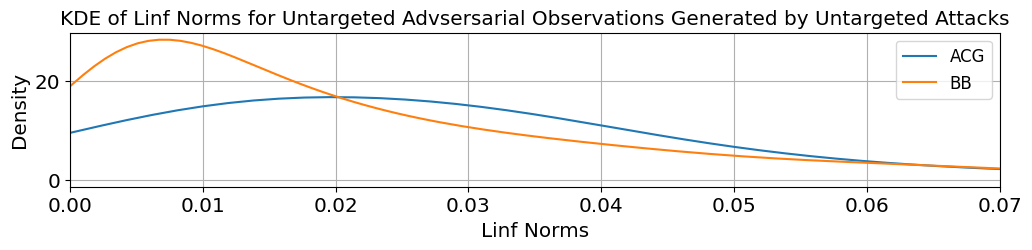

In [22]:
ax = adv_norms.plot.kde(grid=True, 
                   xticks=np.arange(start=adv_norms.min().min(), stop=adv_norms.max().max(), step=0.01),
                   figsize=(12,2),
                   xlim=[0.0,0.07], #NB the max/min of a df is a series, and we need the max/min of the series
                   title='KDE of Linf Norms for Untargeted Advsersarial Observations Generated by Untargeted Attacks',
                   xlabel='Linf Norms',
                   legend=True
                   )
ax.set_xlabel('Linf Norms')
ax.legend(['ACG','BB'])

array([[<Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>]], dtype=object)

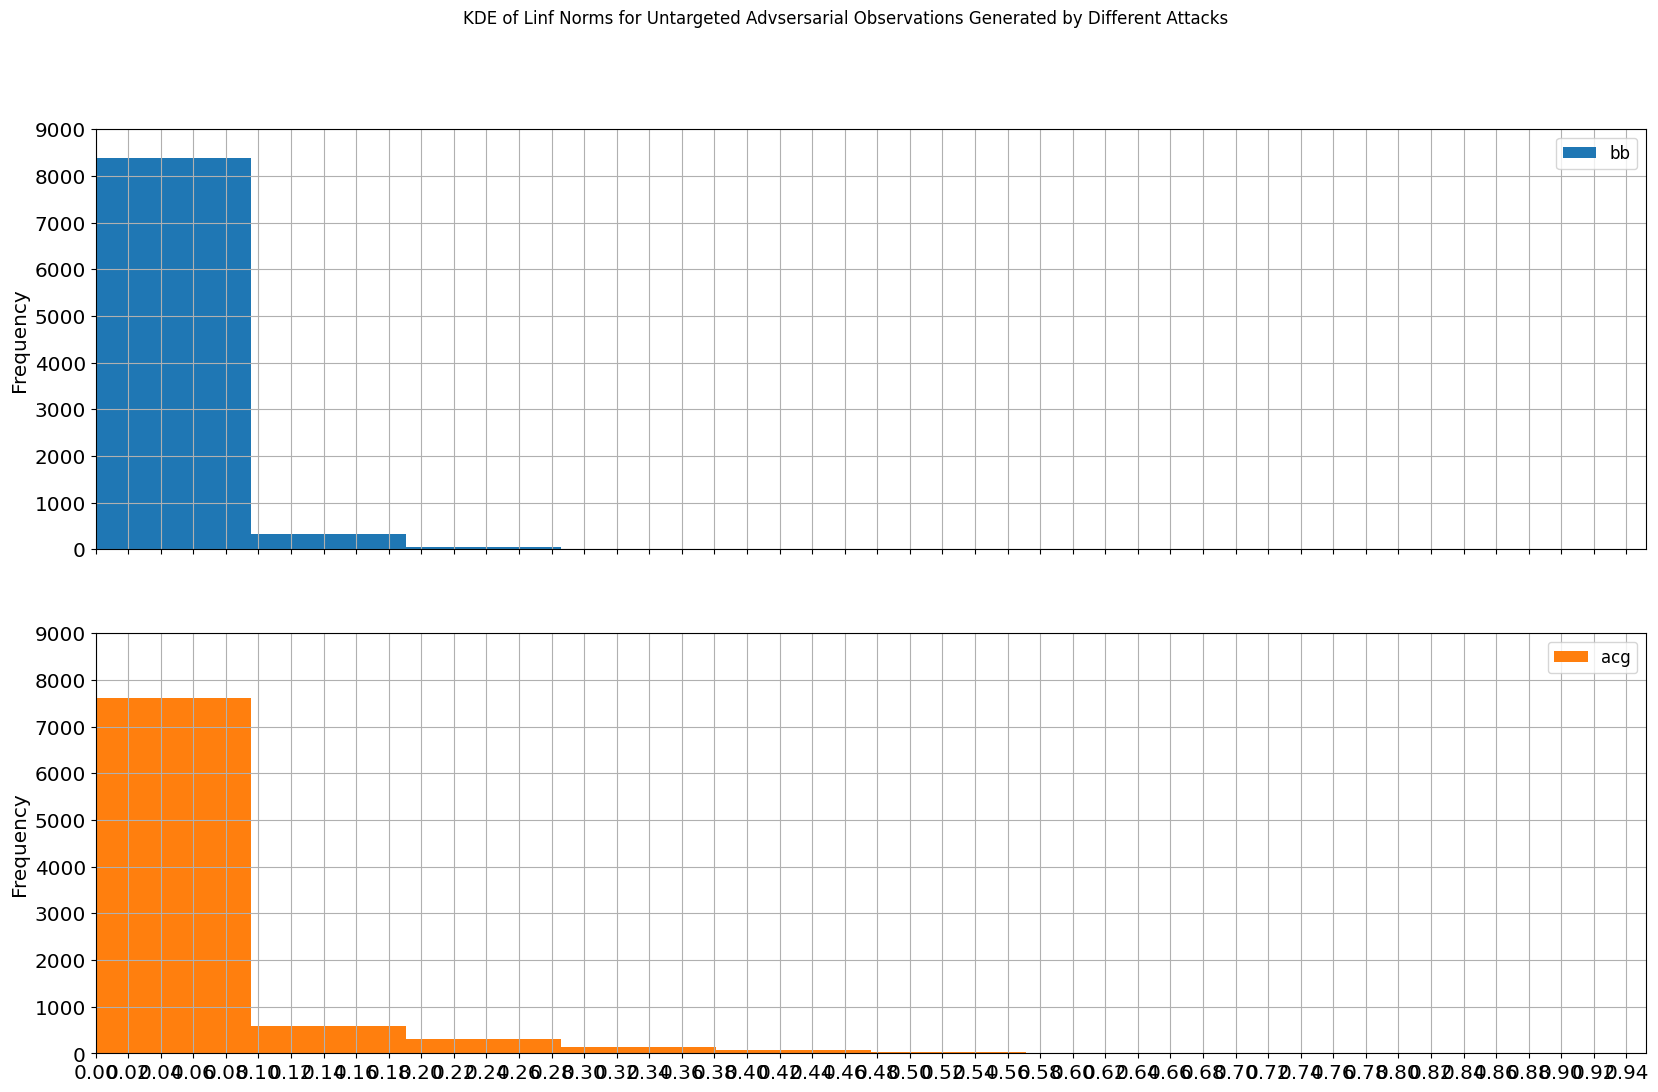

In [14]:
adv_norms[['bb','acg']].plot.hist(grid=True, 
                   figsize=(20,12),
                   xlabel='Linf Norms',
                   xlim=[adv_norms.min().min(),adv_norms.max().max()], #NB the max/min of a df is a series, and we need the max/min of the series
                   ylim=(0,9000),
                   title='KDE of Linf Norms for Untargeted Advsersarial Observations Generated by Different Attacks',
                   xticks=np.arange(start=adv_norms.min().min(), stop=adv_norms.max().max(), step=0.02),
                   legend=True,
                   subplots=True,
                   layout=(2,1),
                   )